<a href="https://colab.research.google.com/github/jaybakky2013/-Tableau-Data-analtyics/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 5px;">Exploratory Data Analysis</h1>

In [ ]:
df.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;">Data Visualisation </h1>

<ipython-input-5-6964fa276c22>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)
No handles with labels found to put in legend.


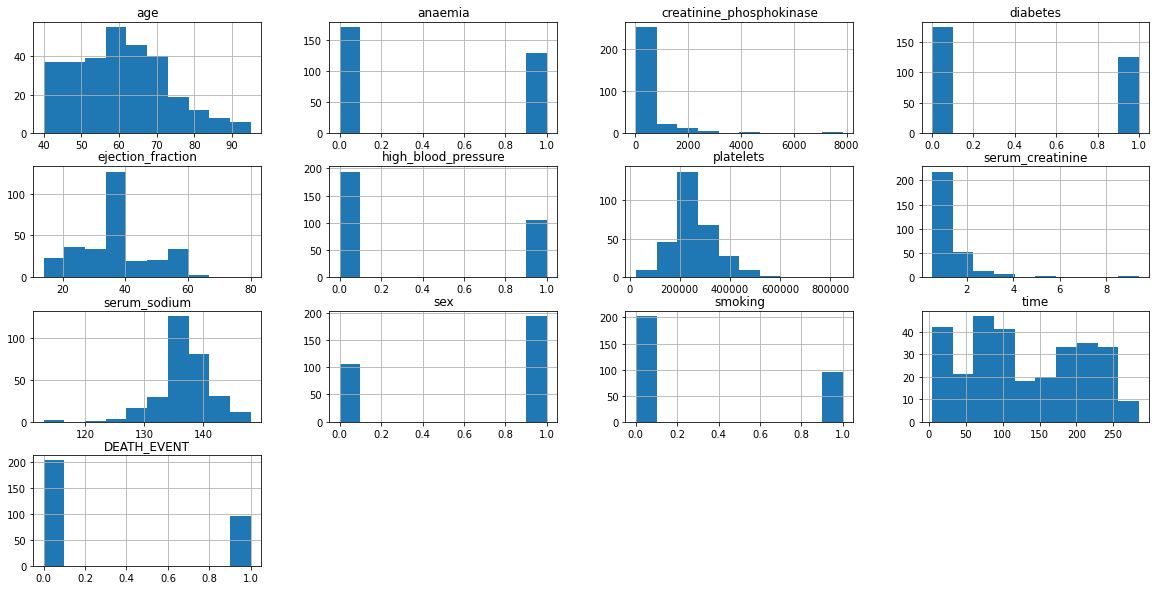

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.gca()
df.hist(ax=ax)
plt.legend()
plt.show()

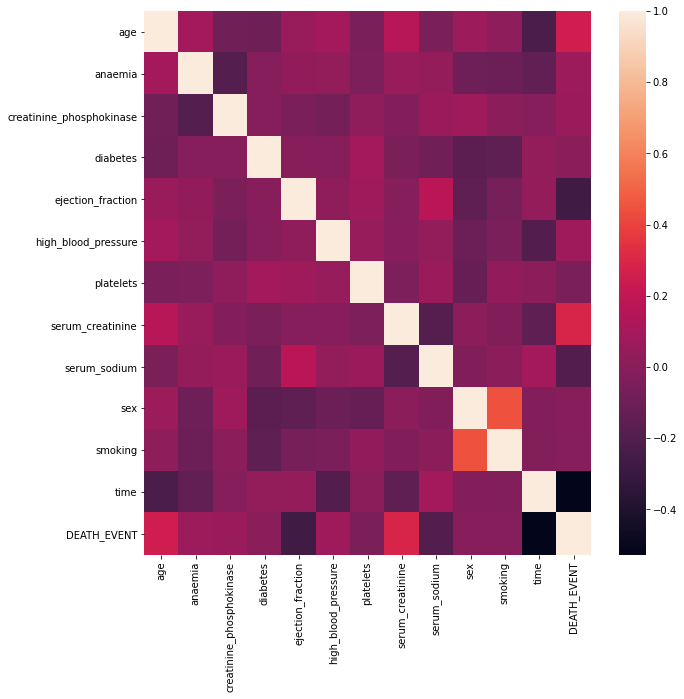

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr())

<a id="1"></a>

<h1 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;">Data Preprocessing </h1>

In [ ]:
y = df['DEATH_EVENT']
X =  df.drop(['DEATH_EVENT'],axis=1)
X['serum_sodium'] = X[X['serum_sodium'] > 130]
X['creatinine_phosphokinase'] = X[X['creatinine_phosphokinase'] < 4000]
X['serum_creatinine'] = X[X['serum_creatinine'] < 4]
X['ejection_fraction'] = X[X['ejection_fraction'] < 60]
X['platelets'] = X[X['platelets'] < 500000]
X['age'] = X[X['age'] < 80]


In [ ]:
X.isnull().sum()

age                         25
anaemia                      0
creatinine_phosphokinase     5
diabetes                     0
ejection_fraction           36
high_blood_pressure          0
platelets                    7
serum_creatinine             8
serum_sodium                22
sex                          0
smoking                      0
time                         0
dtype: int64

# Filling missing values with mean 

In [ ]:
mean_age=X['age'].mean()
X['age']=X['age'].fillna(mean_age)

mean_crea=X['creatinine_phosphokinase'].mean()
X['creatinine_phosphokinase']=X['creatinine_phosphokinase'].fillna(mean_crea)

mean_eje=X['ejection_fraction'].mean()
X['ejection_fraction']=X['ejection_fraction'].fillna(mean_eje)

mean_pla=X['platelets'].mean()
X['platelets']=X['platelets'].fillna(mean_pla)

mean_sec=X['serum_creatinine'].mean()
X['serum_creatinine']=X['serum_creatinine'].fillna(mean_sec)

mean_ses=X['serum_sodium'].mean()
X['serum_sodium']=X['serum_sodium'].fillna(mean_ses)

In [ ]:
X.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

<ipython-input-11-b14bd27104dd>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax=ax)


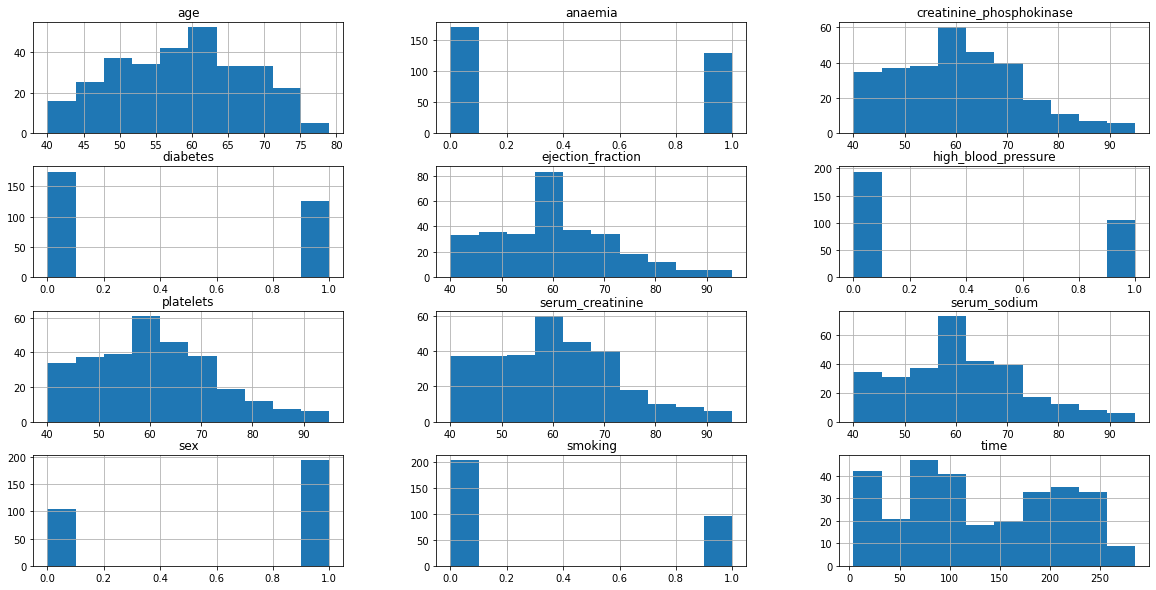

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.gca()
X.hist(ax=ax)
plt.show()

# Handling Class Imbalance

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


# Splitting the data to train and validation data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res,test_size=0.3, random_state=2)


# Building model with GrdaientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

xgb_model =GradientBoostingClassifier( n_estimators=10,) #random_state=10)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        56
           1       0.90      0.79      0.84        66

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122

0.8387096774193549


# Checking important features for Gradient boosting classifier model

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm= PermutationImportance(xgb_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.2984 ± 0.0493,time
0.0836 ± 0.0432,creatinine_phosphokinase
0.0230 ± 0.0191,ejection_fraction
0.0164 ± 0.0232,serum_sodium
0.0082 ± 0.0232,high_blood_pressure
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,serum_creatinine
0 ± 0.0000,platelets
0 ± 0.0000,diabetes


# Building  model with Support Vector Classifier

In [ ]:
svm_model=SVC(kernel='sigmoid')
svm_model.fit(X_train,y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        56
           1       0.70      0.76      0.73        66

    accuracy                           0.70       122
   macro avg       0.70      0.69      0.69       122
weighted avg       0.70      0.70      0.70       122

0.7299270072992701


# Checking important features for Support vector classifier model

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm= PermutationImportance(svm_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.0934 ± 0.0422,time
0.0492 ± 0.0359,platelets
0.0393 ± 0.0480,serum_sodium
0.0377 ± 0.0368,serum_creatinine
0.0377 ± 0.0692,creatinine_phosphokinase
0.0311 ± 0.0318,ejection_fraction
0.0279 ± 0.0321,age
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,high_blood_pressure


In [ ]:
rf_model = RandomForestClassifier(max_depth=4, random_state=2)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        56
           1       0.90      0.82      0.86        66

    accuracy                           0.85       122
   macro avg       0.85      0.86      0.85       122
weighted avg       0.86      0.85      0.85       122

0.8571428571428572


# Checking important features for Naive Bayes model

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm= PermutationImportance(rf_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.2869 ± 0.0452,time
0.0180 ± 0.0282,creatinine_phosphokinase
0.0131 ± 0.0222,platelets
0.0115 ± 0.0080,ejection_fraction
0.0115 ± 0.0080,anaemia
0.0098 ± 0.0066,age
0.0082 ± 0.0104,smoking
0.0082 ± 0.0104,diabetes
0.0066 ± 0.0066,high_blood_pressure
0.0016 ± 0.0066,serum_creatinine
